EXERCISE 1

Importing Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


First look to our image

[[156 156 156 ... 156 157 154]
 [156 156 156 ... 161 164 163]
 [155 155 155 ... 157 160 159]
 ...
 [100 103 105 ... 113 116 118]
 [100 102 104 ... 118 123 125]
 [ 99 102 104 ... 121 127 130]]


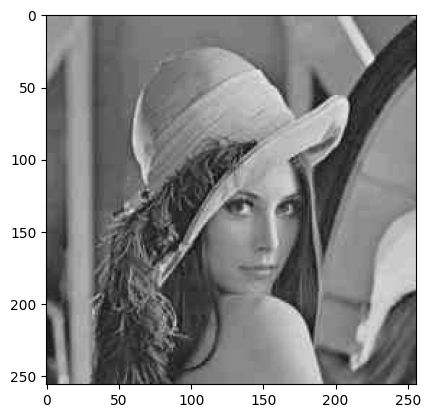

In [2]:
image=cv.imread("test1.jpg",0)
print(image)
plt.imshow(image, cmap='gray')

Necessary functions

In [3]:

def create_histogram(image): 
      m,n,size,l = calculate_vars(image)
      hist = [0] * l
      for i in range(m):
            for j in range(n):
                  g_p = image[i,j]
                  hist[g_p] += 1
      return hist, l, size, m, n


def calculate_cdf(hist,size,l):
      normalized_hist = np.divide(hist, size)  
      s = [0] * l
      cumulative_sum = 0
      for intensity_level in range(0,l):
            cumulative_sum += normalized_hist[intensity_level]
            s[intensity_level] = (l - 1) * cumulative_sum
      s = np.array(s)  
      rounded_s = np.round(s)
      cdf = rounded_s.astype(int)
      return cdf

def calculate_vars(image):
      m,n = image.shape
      size = m * n
      bit_L = image.dtype.itemsize * 8
      l = 2 ** bit_L
      return m,n,size,l
def draw_image_versus_equalized_image(image, equalized_image):
      cv.namedWindow("Original Image", cv.WINDOW_NORMAL)
      cv.namedWindow("Equalized Image", cv.WINDOW_NORMAL)
      cv.imshow("Original Image", image)
      cv.imshow("Equalized Image", equalized_image)
      cv.waitKey(0)
      cv.destroyAllWindows()
      #cv.imwrite("equalized_image.jpg", equalized_image)
def mapping_to_new_Image(image,cdf_eq):
      m,n,size,l = calculate_vars(image)
      imgEqualized = np.zeros((m,n))
      for i in range(m):
            for j in range(n):
                  r = image[i,j]
                  s = cdf_eq[r]
                  imgEqualized[i,j] = s
      return imgEqualized

OpenCV Equalization

In [4]:
equalized_image = cv.equalizeHist(image)
draw_image_versus_equalized_image(image,equalized_image)
output_2 = equalized_image

From Scratch Histogram Equalization Algorithms

Number 1 :

In [5]:
hist, bins = np.histogram(image.flatten(), 256, [0, 256])
m,n,size,l = calculate_vars(image)
cdf_eq = calculate_cdf(hist,size,l)
image_Equalized = mapping_to_new_Image(image,cdf_eq)
image_Equalized = np.uint8(image_Equalized)
draw_image_versus_equalized_image(image,image_Equalized)
ab = abs(image_Equalized - equalized_image)
output_1 = image_Equalized

Number 2 :

In [8]:
# 1 - initializing histogram

m,n,size,l = calculate_vars(image)
hist_2 = np.zeros(l, dtype=int)
for i in range(n):
      for j in range(m):
            g_p = image[i,j]
            hist_2[g_p] +=1
# 2 - initializing cumulative histogram

hist_cumulative = np.zeros(l, dtype=int)
hist_cumulative[0] = hist_2[0]
for g in range(1,l) :
      hist_cumulative[g] = hist_cumulative[g-1] + hist_2[g]
# 3 - H_min and g_min

g_min = hist_2.max()
min_index = 0
for index in range(l):
      if hist_2[index] > 0 and hist_2[index] < g_min:
            g_min = hist_2[index]
            min_index = index
g_min = min_index # g_min denotes an index.
H_min = hist_cumulative[g_min]
# 4 - Setting Transform func

transform = np.round(((hist_cumulative - H_min) * (l - 1)) / (n * m - H_min))

'''transform = np.zeros(l) : This was my implementation but above, there is a better vectorized implementation with T. The result will be same.
for index in range(l):
      transform[index] = round( ((hist_cumulative[index] - H_min) * (l - 1)) / (size - H_min))'''
# 5 - Rescaning image

output_image = image.copy()
for i in range(n):
    for j in range(m):
        g_p = image[i, j]
        g_q = transform[g_p]
        output_image[i, j] = g_q
draw_image_versus_equalized_image(image,output_image)
output_3 = output_image

In [9]:
draw_image_versus_equalized_image(equalized_image,output_image)

In [ ]:
print( np.sum(abs(equalized_image - output_image)))

Evaluation Part :

In [6]:
cv.namedWindow("Output 1", cv.WINDOW_NORMAL)
cv.namedWindow("Output 2", cv.WINDOW_NORMAL)
cv.imshow("Output 1", output_1)
cv.imshow("Output 2", output_2)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
cv.namedWindow("Output 1", cv.WINDOW_NORMAL)
cv.namedWindow("Output 2", cv.WINDOW_NORMAL)
cv.imshow("Output 1", output_1)
cv.imshow("Output 2", abs(output_1 - output_2))
cv.waitKey(0)
cv.destroyAllWindows()
print("The difference between Algorithm 1 and OpenCV's is : ", np.sum(abs(output_1 - output_2)))

The difference between Algorithm 1 and OpenCV's is :  484


In [10]:
cv.namedWindow("Output 3", cv.WINDOW_NORMAL)
cv.namedWindow("Output 2", cv.WINDOW_NORMAL)
cv.imshow("Output 3", output_3)
cv.imshow("Output 2", output_2)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
cv.namedWindow("Output 3", cv.WINDOW_NORMAL)
cv.namedWindow("Output 2", cv.WINDOW_NORMAL)
cv.imshow("Output 3", output_3)
cv.imshow("Output 2", abs(output_3 - output_2))
cv.waitKey(0)
cv.destroyAllWindows()
print("The difference between Algorithm 2 and OpenCV's is : ", np.sum(abs(output_3 - output_2)))

The difference between Algorithm 2 and OpenCV's is :  0
